In [2]:
using FileIO, JLD2
using DifferentialEquations
using Random

In [3]:
include("solvers.jl")
include("useful_functions.jl")
include("plot_functions.jl")


PlotPipPlot (generic function with 1 method)

In [377]:
# initial conditions
x = [-7; 
     -7; 
     15]
x2 = [20; 
      -15; 
      3]
θ = 10; μ = 28; β = 8/3
p = [θ μ β]
t = 30
Δt = 0.0002 #as small as smallest dt we tested with

0.0002

In [411]:
function P1(t)
    μ = 19 + 10^(-2.5)*t^2
    if μ < 28
        return [θ, μ + sin(t), β]
    else
        return [θ, 28, β]
    end
end
function P2(t)
    return [θ, 19+5*sin(2*pi*t)+2.5*cos(4*pi*t), β]
end

P2 (generic function with 1 method)

In [412]:
function P3(t)
    return [θ, 19+5*sin(2*pi*t), β]
end

P3 (generic function with 1 method)

In [413]:
X1 = LorenzSolutionFixedTimeStep(P2, Δt, Integer(t/Δt), x, RK4) 
X2 = LorenzSolutionFixedTimeStep(P3, Δt, Integer(t/Δt), x, RK4) 

3×150001 Matrix{Float64}:
 -7.0  -7.0      -7.00002  -7.00004  …  3.97316  3.97722  3.9813   3.98538
 -7.0  -7.00421  -7.00842  -7.01264     6.00455  6.01212  6.01971  6.0273
 15.0  15.0018   15.0036   15.0054      7.95168  7.95221  7.95276  7.95332

In [414]:
Integer(t/Δt)

150000

In [415]:
#PlotTrajectories([X2[:,200000:end]])
#savefig("increase_mu_with_t_squared.png")

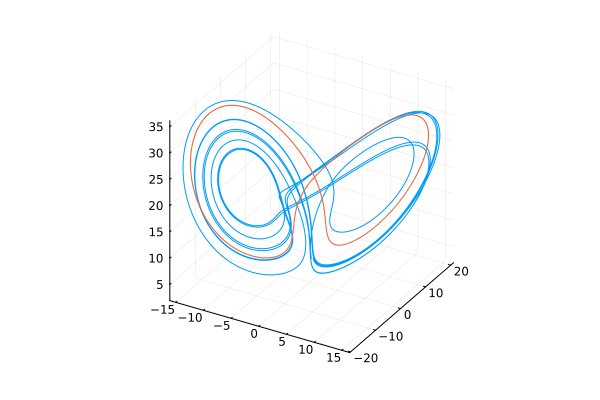

In [416]:
p=plot()
PlotTrajectories(p,[X1[:,80000:end],X2[:,80000:end]])
#savefig("eight_f2pi_cos1.png")